In [4]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Frederick\anaconda3\envs\test_proyec\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import seaborn as sns

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

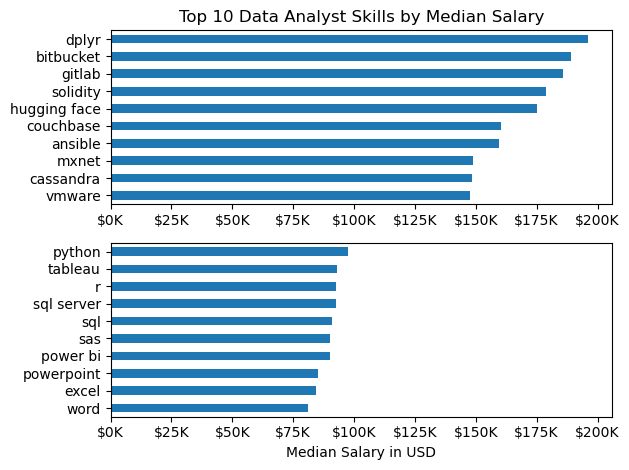

In [5]:
df_DA_US = df_DA_US.explode("job_skills")

df_DA_US[["salary_year_avg","job_skills"]]

df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])

df_DA_top_pay = df_DA_US_group.sort_values("median", ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values("count", ascending=False).head(10).sort_values("median", ascending=False)

fig, ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Data Analyst Skills by Median Salary")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

df_DA_skills.plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel("Median Salary in USD")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

fig.tight_layout()
plt.show()

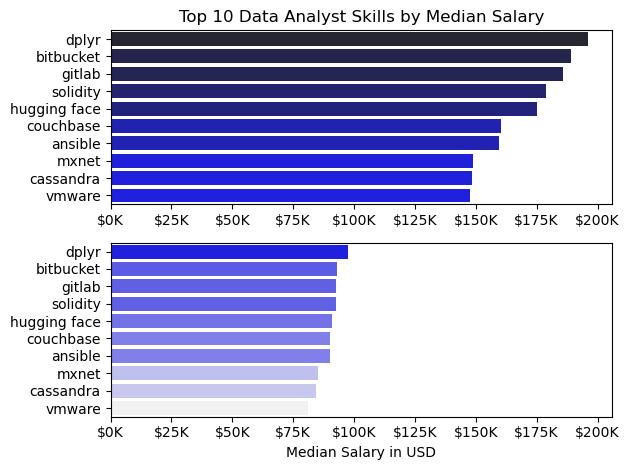

In [13]:
fig, ax = plt.subplots(2, 1)

sns.set_theme

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(
    data=df_DA_top_pay,
    x="median",
    y=df_DA_top_pay.index,
    ax=ax[0],
    hue="median",
    palette="dark:b_r",
    legend=False,
)

# df_DA_top_pay.plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Data Analyst Skills by Median Salary")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

sns.barplot(
    data=df_DA_skills,
    x="median",
    y=df_DA_top_pay.index,
    ax=ax[1],
    hue="median",
    palette="light:b",
    legend=False,
)

# df_DA_skills.plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel("Median Salary in USD")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

fig.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Jobs')

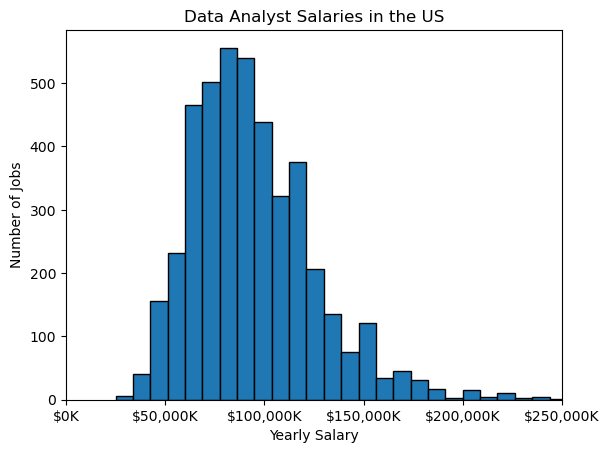

In [6]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA_US["salary_year_avg"].plot(kind="hist", bins=40, edgecolor="black")

plt.xlim(0, 250_000)

ax = plt.gca()
ax.xaxis.set_major_formatter('${x:,g}K')

plt.title("Data Analyst Salaries in the US")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")

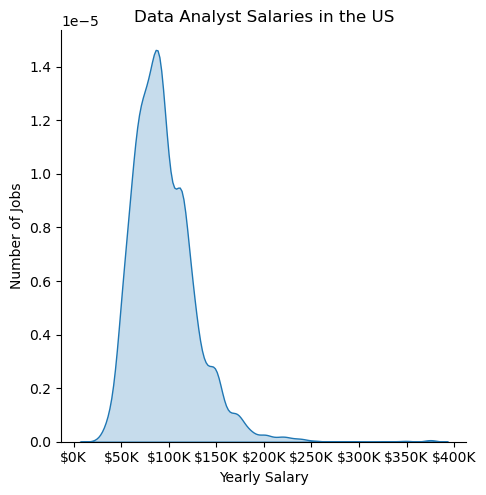

In [13]:
sns.displot(df_DA_US["salary_year_avg"], kind="kde", fill=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

plt.title("Data Analyst Salaries in the US")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.show()